$a_1$, $a_2$: alternatives

$c_1$, $c_2$: criteria

$bad$, $good$: categories

$q = 2$, $p = 4$, $v = 8$: theresholds indifference,, preference, veto

$w_1 = 0.7$, $w_2 = 0.3$: weights for criteria 1 and 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Performance matrix
A = pd.DataFrame({
    'c0': [11.5, 14],
    'c1': [18, 15]},
    index=['a0', 'a1'])

print("\nPerformance matrix A = \n")
A


Performance matrix A = 



,c0,c1
a0,11.5,18
a1,14.0,15


In [3]:
# Base profiles
B = pd.DataFrame({
    'c0': [12, 15],
    'c1': [15, 20]},
    index=['b0', 'b1'])
print("\nBase profiles B =\n")
B


Base profiles B =



,c0,c1
b0,12,15
b1,15,20


In [4]:
# Thresholds
T = pd.DataFrame({
    'c0': [2, 4, 8],
    'c1': [2, 4, 8]},
    index=['q', 'p', 'v'])

print("\nThresholds T =\n")
T


Thresholds T =



,c0,c1
q,2,2
p,4,4
v,8,8


Concordance between alternative $a$ and base profile $b$, $c(a, b)$: $a$ outperforms or is at least as good as base profile $b$.

Partial concordance

$$
c_j(a_i,b_k)=\left\{\begin{matrix}
1, & \text{if} \ g_j(a_i) \geq g_j(b_k) - q_j  \\
0, & \text{if} \  g_j(a_i) \leq g_j(b_k) - p_j\\
\frac{g_j(a_i) - g_j(b_k) + p_j}{p_j - q_j}, & \text{otherwise} \\
\end{matrix}\right.
$$

[Perplexity FR](https://www.perplexity.ai/search/what-are-tensorflow-and-pytorc-hsXlWdYnSRqGTHgNCdgpow#2), 
[Perplexity EN](https://www.perplexity.ai/search/what-are-tensorflow-and-pytorc-hsXlWdYnSRqGTHgNCdgpow#3)

In [5]:
# Function to calculate the concordance value
def calculate_concordance(a, b, q, p):
    if a >= b - q:
        return 1
    elif a <= b - p:
        return 0
    else:
        return (a - b + p) / (p - q)

In [6]:
# Partial concordance C
C = pd.DataFrame(index=['a0_b0', 'a1_b0', 'a0_b1', 'a1_b1'],
                 columns=['c0', 'c1'])

for i in ['a0', 'a1']:
    for k in ['b0', 'b1']:
        for j in ['c0', 'c1']:
            a = A.loc[i, j]
            b = B.loc[k, j]
            q = T.loc['q', j]
            p = T.loc['p', j]
            C.loc[f'{i}_{k}', j] = calculate_concordance(
                a, b, q, p)

print("\nPartial concordance C =")
C


Partial concordance C =


,c0,c1
a0_b0,1,1
a1_b0,1,1
a0_b1,0.25,1
a1_b1,1,0


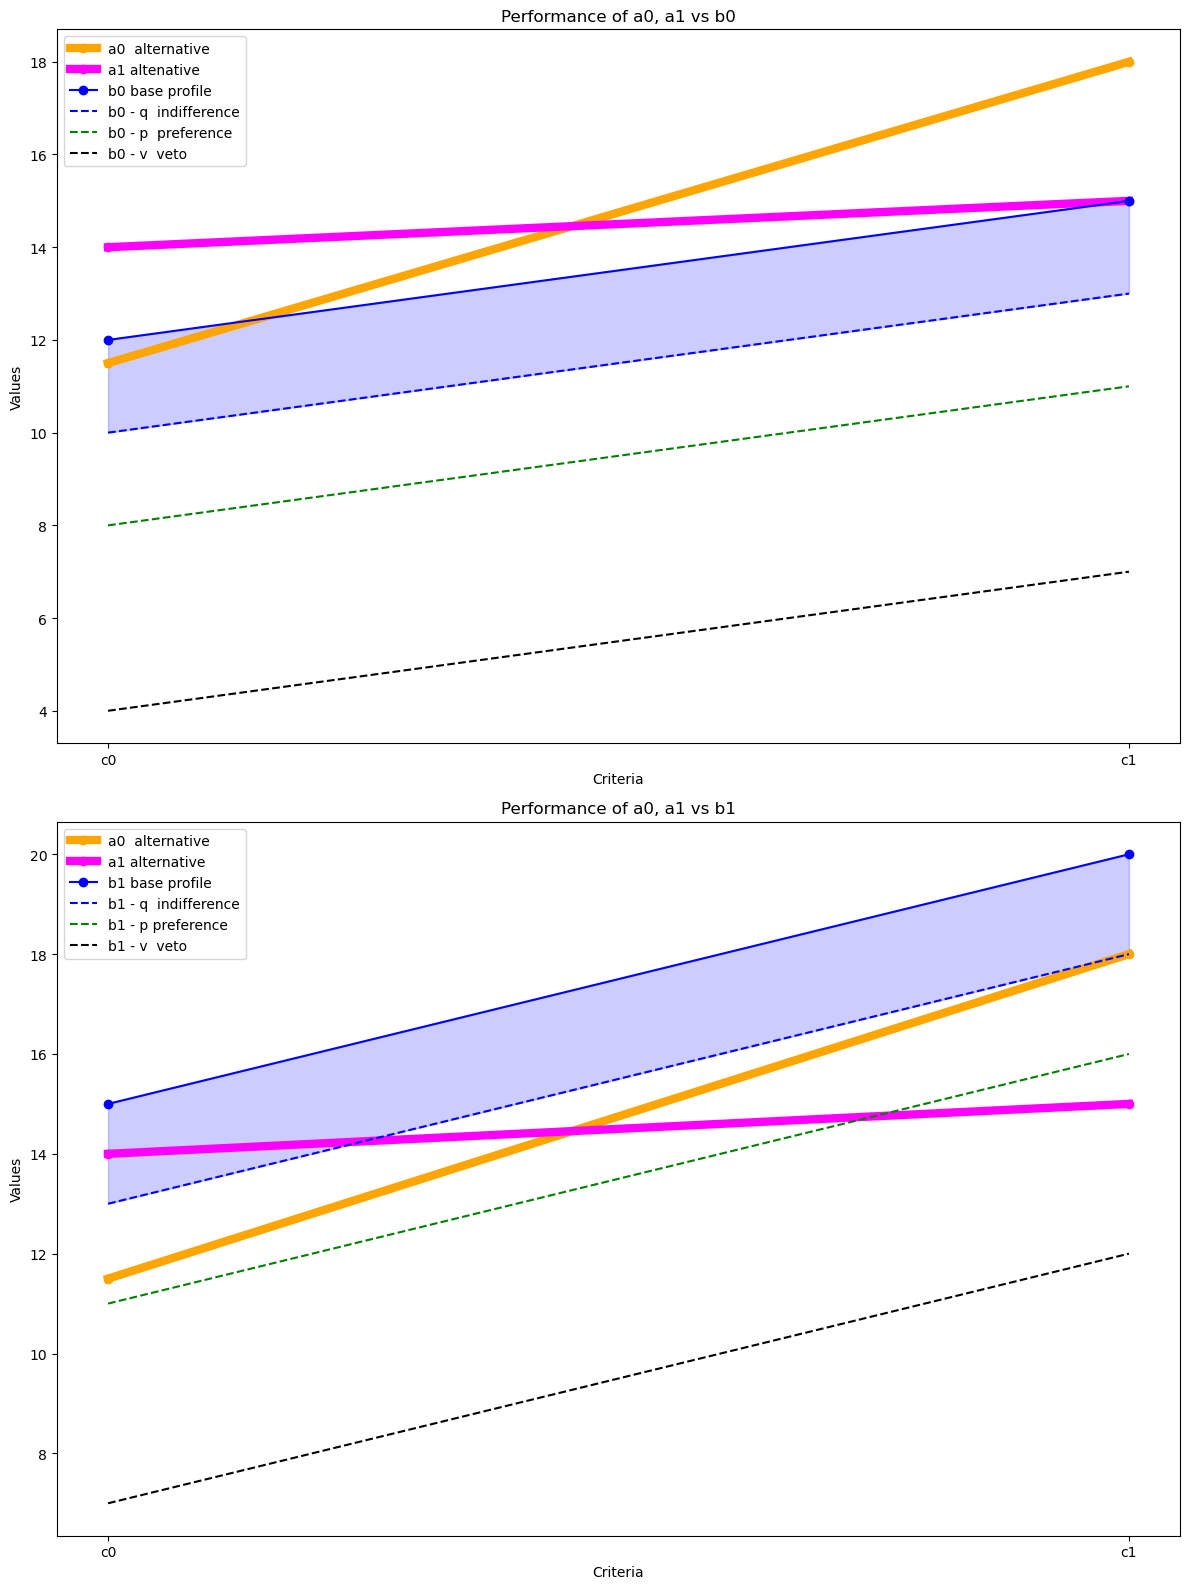

In [7]:
# Create the plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Subplot 1 (with b0)
x = [0, 1]
ax1.plot(x, A.loc['a0'], color='orange', marker='o', linewidth=6,
         label='a0  alternative')
ax1.plot(x, A.loc['a1'], color='magenta', marker='o', linewidth=6,
         label='a1 altenative')
ax1.plot(x, B.loc['b0'], color='blue', marker='o',
         label='b0 base profile')

# Calculate and plot b0 - q, b0 - p, b0 - v
q_values = T.loc['q']
p_values = T.loc['p']
v_values = T.loc['v']

b0_minus_q = B.loc['b0'] - q_values
b0_minus_p = B.loc['b0'] - p_values
b0_minus_v = B.loc['b0'] - v_values

ax1.plot(x, b0_minus_q, color='blue', linestyle='--',
         label='b0 - q  indifference')
ax1.plot(x, b0_minus_p, color='green', linestyle='--',
         label='b0 - p  preference')
ax1.plot(x, b0_minus_v, color='black', linestyle='--',
         label='b0 - v  veto')

# Fill area between b0 and b0_minus_q
ax1.fill_between(x, B.loc['b0'], b0_minus_q, color='blue', alpha=0.2)

ax1.set_xticks(x)
ax1.set_xticklabels(['c0', 'c1'])
ax1.set_xlabel('Criteria')
ax1.set_ylabel('Values')
ax1.set_title('Performance of a0, a1 vs b0')
ax1.legend()

# Subplot 2 (with b1)
ax2.plot(x, A.loc['a0'], color='orange', marker='o', linewidth=6,
         label='a0  alternative')
ax2.plot(x, A.loc['a1'], color='magenta', marker='o', linewidth=6,
         label='a1 alternative')
ax2.plot(x, B.loc['b1'], color='blue', marker='o',
         label='b1 base profile')

# Calculate and plot b1 - q, b1 - p, b1 - v
b1_minus_q = B.loc['b1'] - q_values
b1_minus_p = B.loc['b1'] - p_values
b1_minus_v = B.loc['b1'] - v_values

ax2.plot(x, b1_minus_q, color='blue', linestyle='--',
         label='b1 - q  indifference')
ax2.plot(x, b1_minus_p, color='green', linestyle='--',
         label='b1 - p preference')
ax2.plot(x, b1_minus_v, color='black', linestyle='--',
         label='b1 - v  veto')

# Fill area between b1 and b1_minus_q
ax2.fill_between(x, B.loc['b1'], b1_minus_q, color='blue', alpha=0.2)

ax2.set_xticks(x)
ax2.set_xticklabels(['c0', 'c1'])
ax2.set_xlabel('Criteria')
ax2.set_ylabel('Values')
ax2.set_title('Performance of a0, a1 vs b1')
ax2.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
print("\nPartial concordance C =")
C


Partial concordance C =


,c0,c1
a0_b0,1,1
a1_b0,1,1
a0_b1,0.25,1
a1_b1,1,0
